In [ ]:
!pip install selenium

In [ ]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
phish_data = pd.read_csv('/content/urls3.csv')

In [ ]:
phish_data.head()

,URL,ipv4,ipv6,TTL,snL,Label
0,tools.ietf.org/html/rfc1924,2,16,229,33,good
1,secure.runescape.com.wwweb.asia/m=weblogin/log...,19,5,76,34,bad
2,us.battle.net.login.en.yp-login.com/login/en/i...,17,6,72,95,bad
3,www.wso.net/palace.htm,4,9,129,47,good
4,'www.huayuanmovies.com/js/?us.battle.net/login...,14,5,120,135,bad


In [ ]:
phish_data.tail()

,URL,ipv4,ipv6,TTL,snL,Label
7995,www.lindepaint.com/js/?us.battle.net/login/en/...,11,8,64,83,bad
7996,update-information002.binboadesign.com/?/cgi-,17,6,119,34,bad
7997,www.theregister.co.uk/2001/01/11/europe_warms_...,3,16,169,33,good
7998,aloskim.org/KoMPL4HnTSMo/webscrprim.php?YWxvc2...,21,8,119,54,bad
7999,dmyishu.com/images/,18,6,67,41,bad


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     8000 non-null   object
 1   ipv4    8000 non-null   int64 
 2   ipv6    8000 non-null   int64 
 3   TTL     8000 non-null   int64 
 4   snL     8000 non-null   int64 
 5   Label   8000 non-null   object
dtypes: int64(4), object(2)
memory usage: 375.1+ KB


In [ ]:
phish_data.isnull().sum() # there is no missing values

URL      0
ipv4     0
ipv6     0
TTL      0
snL      0
Label    0
dtype: int64

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['tools', 'ietf', 'org', 'html', 'rfc']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.04911337599969556 sec


In [ ]:
phish_data.sample(5)

,URL,ipv4,ipv6,TTL,snL,Label,text_tokenized
5296,www.xjbctcky.com/images?ref=us.battle.net/d3/e...,17,6,120,76,bad,"[www, xjbctcky, com, images, ref, us, battle, ..."
610,www.worldlive.cz/en/postcards,4,12,229,33,good,"[www, worldlive, cz, en, postcards]"
4889,floor-best.ru/wp-content/themes/toolbox/pp-pur...,24,1,91,135,bad,"[floor, best, ru, wp, content, themes, toolbox..."
6039,esxcc.com/js/index.htm?us.battle.net/login/en/...,17,6,65,64,bad,"[esxcc, com, js, index, htm, us, battle, net, ..."
2056,groups.yahoo.com/group/palace-server/,3,21,238,34,good,"[groups, yahoo, com, group, palace, server]"


In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 1.1070667930002855 sec


In [ ]:
phish_data.sample(5)

,URL,ipv4,ipv6,TTL,snL,Label,text_tokenized,text_stemmed
3251,news.bbc.co.uk/1/hi/entertainment/976047.stm,5,12,259,27,good,"[news, bbc, co, uk, hi, entertainment, stm]","[news, bbc, co, uk, hi, entertain, stm]"
2040,www.smvworld.com/del,21,8,112,83,bad,"[www, smvworld, com, del]","[www, smvworld, com, del]"
2292,antaradms.com/antarasys/paypal/,18,4,78,64,bad,"[antaradms, com, antarasys, paypal]","[antaradm, com, antarasi, paypal]"
6185,www.freewebs.com/fishnetfreak/index.htm,0,15,149,33,good,"[www, freewebs, com, fishnetfreak, index, htm]","[www, freeweb, com, fishnetfreak, index, htm]"
4783,www.bjcurio.com/js/index.htm?us.battle.net/log...,23,2,71,91,bad,"[www, bjcurio, com, js, index, htm, us, battle...","[www, bjcurio, com, js, index, htm, us, battl,..."


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.013120050999987143 sec


In [ ]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the URLs to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(phish_data)

# Convert the TF-IDF features to a dense array for further processing
tfidf_features_array = tfidf_features.toarray()

# The tfidf_features_array contains the numerical representation of the tokens
print(tfidf_features_array)


[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
print(tfidf_features)

  (0, 8)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 7)	1.0
  (4, 3)	1.0
  (5, 2)	1.0
  (6, 6)	1.0
  (7, 5)	1.0
  (8, 4)	1.0


In [ ]:
#create cv object
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(phish_data.text_sent,phish_data.snL) #transform all text which we tokenize and stemed

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [ ]:

print(testX.shape[0])

2000


In [ ]:
# create lr object
lr = LogisticRegression()

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(testX,testY)

0.96

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9888333333333333
Testing Accuracy : 0.96

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.98      0.96       926
        Good       0.98      0.94      0.96      1074

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000


CONFUSION MATRIX


<Axes: >

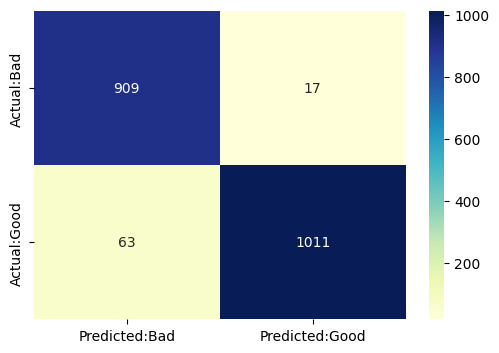

In [ ]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
# create mnb object
mnb = MultinomialNB()

In [ ]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [ ]:
mnb.score(testX,testY)

0.944

In [ ]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.978
Testing Accuracy : 0.944

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.96      0.94       930
        Good       0.97      0.93      0.95      1070

    accuracy                           0.94      2000
   macro avg       0.94      0.95      0.94      2000
weighted avg       0.94      0.94      0.94      2000


CONFUSION MATRIX


<Axes: >

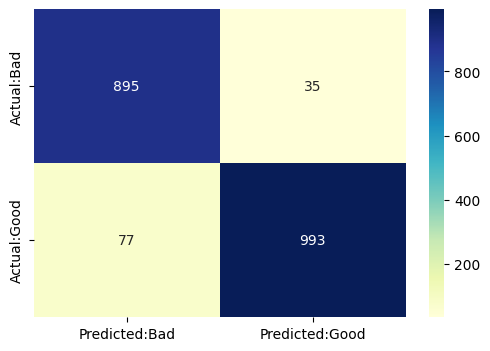

In [ ]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()


In [ ]:
rf_classifier.fit(trainX,trainY)

RandomForestClassifier()

In [ ]:
rf_classifier.score(testX,testY)

0.96

In [ ]:
Scores_ml['RandomForestClassifier'] = np.round(rf_classifier.score(testX,testY),2)

Training Accuracy : 1.0
Testing Accuracy : 0.96

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.96      0.96      0.96       968
        Good       0.96      0.96      0.96      1032

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000


CONFUSION MATRIX


<Axes: >

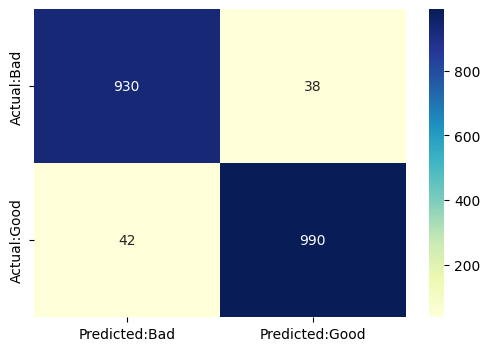

In [ ]:
print('Training Accuracy :',rf_classifier.score(trainX,trainY))
print('Testing Accuracy :',rf_classifier.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(rf_classifier.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(rf_classifier.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
import xgboost as xgb

In [ ]:
# trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)
xgb = xgb.XGBClassifier()

In [ ]:
from sklearn.preprocessing import LabelEncoder

trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on your target labels and transform them
trainY_encoded = label_encoder.fit_transform(trainY)

# Now train the XGBoost classifier using the encoded labels
xgb.fit(trainX, trainY_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
testY_encoded = label_encoder.fit_transform(testY)
xgb.score(testX,testY_encoded)

0.9525

In [ ]:
Scores_ml['XGBClassifier'] = np.round(xgb.score(testX,testY_encoded),2)

Training Accuracy : 0.9525
Testing Accuracy : 0.9525

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.98      0.95       959
        Good       0.98      0.93      0.95      1041

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


CONFUSION MATRIX


<Axes: >

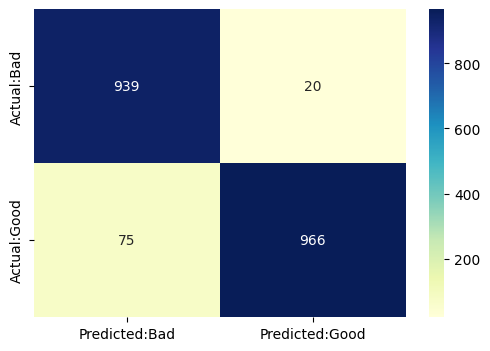

In [ ]:
print('Training Accuracy :',xgb.score(trainX,trainY_encoded))
print('Testing Accuracy :',xgb.score(testX,testY_encoded))
con_mat = pd.DataFrame(confusion_matrix(xgb.predict(testX), testY_encoded),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(xgb.predict(testX), testY_encoded,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")